- Necessary python libraries are imported here
- Numpy is used to perform basic operatipons
- pyplot from matplotlib is used to visualize the results
- tenserflow is a deeplearning framework
- Keras is a deep learning framework

In [38]:
# tensorflow is developed by google
# Tenssoflow is always based on tensors
# list ==== array====tensors(vector representation])
# Writing only tensorflow code is little tricky
# so we use keeas as backend of tenserflow

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
print(tf.__version__)

2.15.0


In [41]:
# Import the dataset from keras
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [42]:
mnist = keras.datasets.fashion_mnist

In [43]:
mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [44]:
type(mnist)

module

- now we load the data into variables using load_data()
- it returns 2 tuples.The first tupel hass the training data and second tiple has test data

In [45]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

- By using shape we can see that it has 60000 images for traning and each image has a shape of 28*28

In [46]:
X_train.shape , y_train.shape
# it means 60k images
# And each image shape is 28*28 = 784 pixel values

((60000, 28, 28), (60000,))

In [47]:
X_train[1][0]

array([  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
        54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [48]:
len(X_train[0])

28

In [49]:
len(X_train[1][0])

28

In [50]:
# In image we have 784 pixels sre there
# 28*28
# RGB picture : color octure
# Gray        : Not a colour picture
# RGB values ranges between 0 to 255
# Rainbow  : 7
# 2^7 = 256
# 0 = black
# 255 = white
# Digitial image processing openCV

-  As we know that images are divided into 10 categories

In [51]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

- These are all the class names in thir proper order.

In [52]:
class_names = ['top','trouser','pullover','dress','coat',
               'sandel','shirt','sneaker','bag','ankle boot']

- Here we have plotted the second image of our traning set
- plt.figure() function in pyplot module of maplotlib library is used to craate a a new figure
- The plt.imshow() function in pyplot module of matplotlib libary is used to display the data as image
- plt.colobar() displays the colour bar besides the image .You can see the values between 0 to 255

In [53]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [54]:
class_names[9]

'ankle boot'

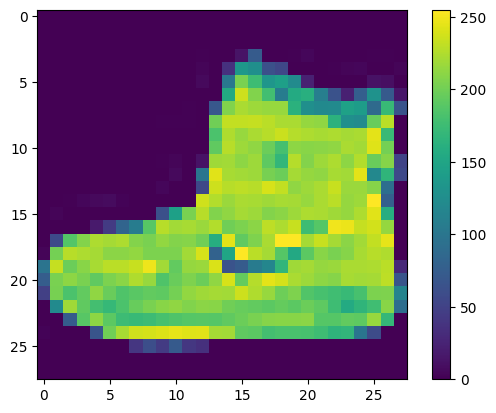

In [55]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

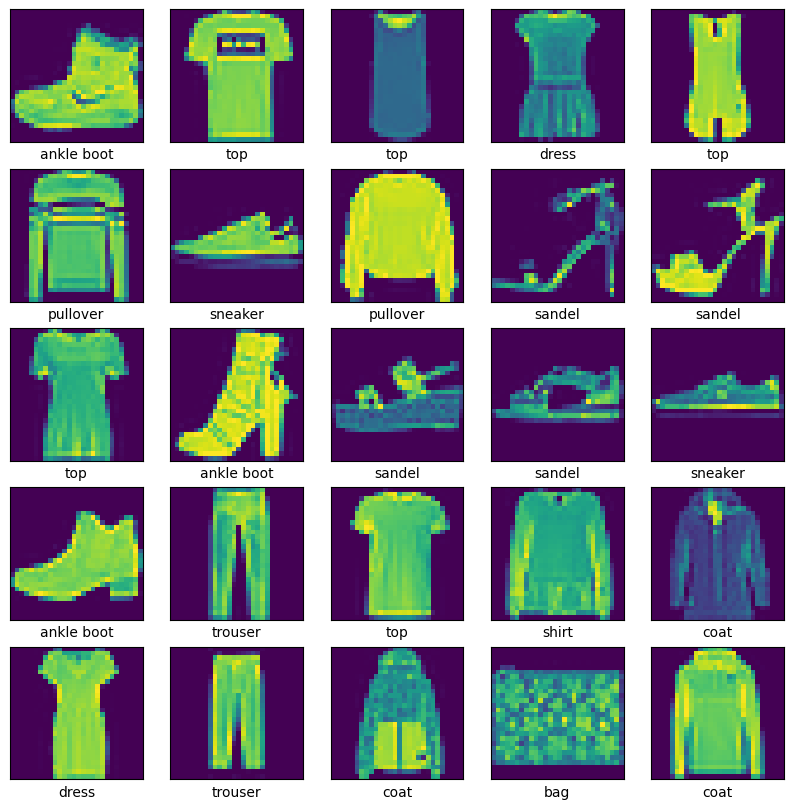

In [56]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

- Normalization
- Neural Network model doesnt take values greater than 1

In [57]:
X_train = X_train/255.0
X_test = X_test/255.0

Now all the values are between 0 - 1

Steps wehave completed untill now
- we read the data
- we understand the data
- we understand the shape of the data
- we plot the data
- we undersand the labels of the data
- we normalize the data


Develop the model

In [58]:
# Take the input layer
# Take the iden layet
# Take the output layer

In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [60]:
model = Sequential()
# imput layer starts flaten 28*28 === 1D
model.add(Flatten(input_shape = (28,28))) # 28 * 28 input

model.add(Dense(128,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [63]:
model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=64,
          verbose = True)

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 0.5147 - accuracy: 0.8208
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.3836 - accuracy: 0.8639
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3465 - accuracy: 0.8755
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3192 - accuracy: 0.8839
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2993 - accuracy: 0.8900
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2858 - accuracy: 0.8950
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2714 - accuracy: 0.8999
Epoch 8/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2602 - accuracy: 0.9036
Epoch 9/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2502 - accuracy: 0.9079
Epoch 10/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2438 - accuracy: 0.909

**Model Evaluation**

In [64]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3476 - accuracy: 0.8762
0.8762000203132629


In [65]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [66]:
print(y_pred[0])

[5.3404867e-05 1.7189860e-09 2.9463789e-07 1.6530011e-08 3.4135886e-07
 2.5785569e-04 9.4939769e-06 2.1060025e-02 1.8377481e-06 9.7861660e-01]


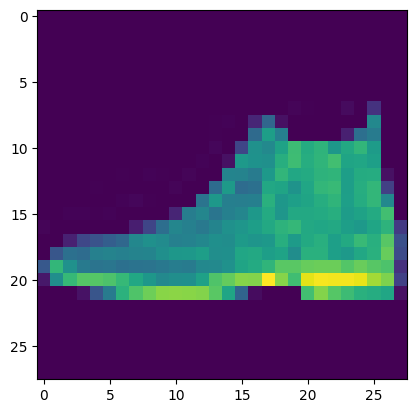

In [67]:
plt.figure()
plt.imshow(X_test[0])
plt.show()

In [68]:
np.max(y_pred[0]),np.argmax(y_pred[0])
# np.max will give max vakue in the y_pred
# np.argmax isused get the number in the list by using the index

(0.9786166, 9)

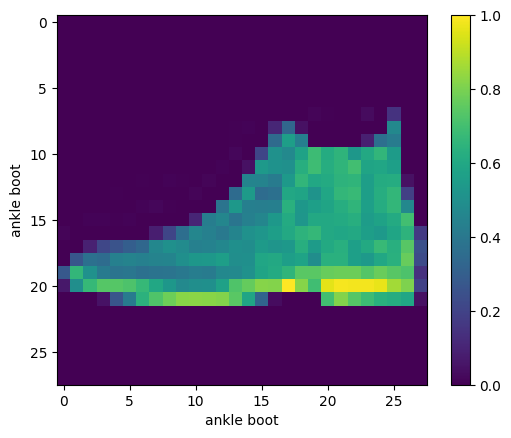

In [69]:
y_pred[0]  # first prediction
max_prop = np.max(y_pred[0]) # Prediction will give probabilites of all classes
index = np.argmax(y_pred[0]) # Index of max probabilty
prediction_class = class_names[index] # using index we are getting class name
Ground_truth_class = class_names[y_test[0]]

plt.figure()
plt.imshow(X_test[0])
plt.xlabel(Ground_truth_class)
plt.ylabel(prediction_class)
plt.colorbar()

In [70]:
max_proba = [np.max(i) for i in y_pred]
index = [np.argmax(i) for i in y_pred]
prediction_class = [class_names[i] for i in index]
Ground_truth_class = [class_names[i] for i in y_test]

d1 = pd.DataFrame(zip(max_proba,index,prediction_class,Ground_truth_class),
             columns =['max_proba','index','prediction_class','Ground_truth_class'])
con = d1['prediction_class'] == d1['Ground_truth_class']
d1['output'] = np.where(con,1,0)

In [71]:
d1

,max_proba,index,prediction_class,Ground_truth_class,output
0,0.978617,9,ankle boot,ankle boot,1
1,0.997886,2,pullover,pullover,1
2,0.999995,1,trouser,trouser,1
3,0.999932,1,trouser,trouser,1
4,0.618657,6,shirt,shirt,1
...,...,...,...,...,...
9995,0.999930,9,ankle boot,ankle boot,1
9996,0.998723,1,trouser,trouser,1
9997,0.995570,8,bag,bag,1
9998,0.999967,1,trouser,trouser,1


In [72]:
con = d1['prediction_class'] == d1['Ground_truth_class']
d1['output'] = np.where(con,1,0)
accuracy = d1['output'].sum()/len(d1['output'])
accuracy

0.8762

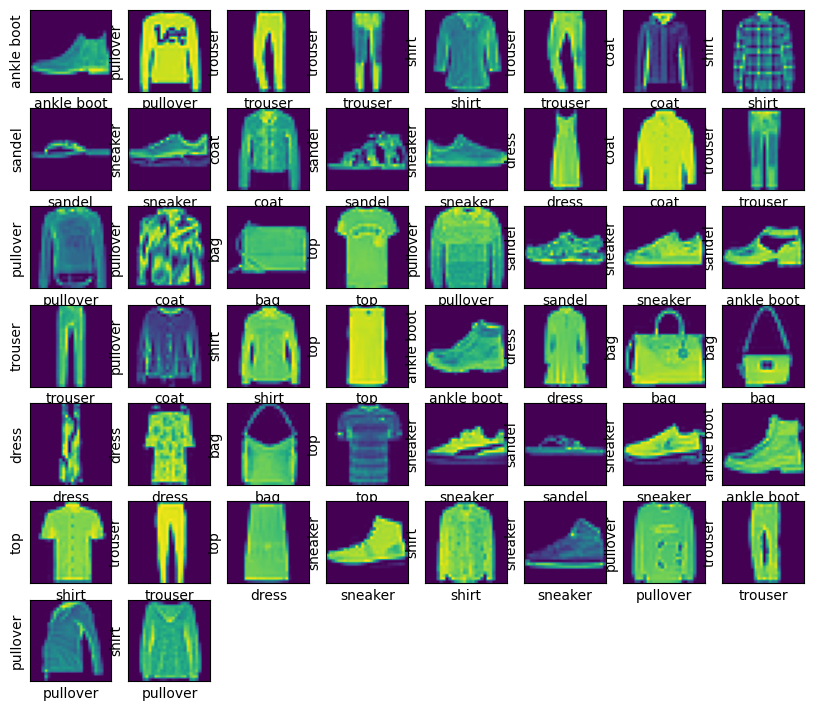

In [75]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[i])
  plt.xlabel(class_names[y_test[i]])
  plt.ylabel(class_names[np.argmax(y_pred[i])])
plt.show()